# Step 1: Understand the Problem and the Data
##### Football is one of the most popular sports in the world, with millions of fans closely following the performance of teams, players, and matches. With the availability of detailed match and player data, there is a growing interest in leveraging data science techniques to gain insights and make predictions in football. This project aims to provide students with hands-on experience in Exploratory Data Analysis (EDA) and Machine Learning (ML) by analyzing football data and building a predictive model for match outcomes.


# Data Loading

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

#load the dataset
df = pd.read_csv("D:/Football_Match_Outcome_Prediction/data/match.csv")
print(df.head())

   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ...  vision  penalties 

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  177109 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [26]:
print(df.describe())

                 id  player_fifa_api_id  player_api_id  overall_rating  \
count  183978.00000       183978.000000  183978.000000   183142.000000   
mean    91989.50000       165671.524291  135900.617324       68.600015   
std     53110.01825        53851.094769  136927.840510        7.041139   
min         1.00000            2.000000    2625.000000       33.000000   
25%     45995.25000       155798.000000   34763.000000       64.000000   
50%     91989.50000       183488.000000   77741.000000       69.000000   
75%    137983.75000       199848.000000  191080.000000       73.000000   
max    183978.00000       234141.000000  750584.000000       94.000000   

           potential       crossing      finishing  heading_accuracy  \
count  183142.000000  183142.000000  183142.000000     183142.000000   
mean       73.460353      55.086883      49.921078         57.266023   
std         6.592271      17.242135      19.038705         16.488905   
min        39.000000       1.000000       1.0

In [27]:
df.nunique()

id                     183978
player_fifa_api_id      11062
player_api_id           11060
date                      197
overall_rating             61
potential                  56
preferred_foot              2
attacking_work_rate         7
defensive_work_rate        19
crossing                   95
finishing                  97
heading_accuracy           96
short_passing              95
volleys                    93
dribbling                  97
curve                      92
free_kick_accuracy         97
long_passing               95
ball_control               93
acceleration               86
sprint_speed               85
agility                    81
reactions                  78
balance                    81
shot_power                 96
jumping                    79
stamina                    84
strength                   82
long_shots                 96
aggression                 91
interceptions              96
positioning                95
vision                     97
penalties 

# Step2: Handle Missing Values

In [28]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    6869
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

#### before handling the missing values, we need to extract the relevant features from the dataset

In [29]:
relevant_features = ['potential', 'crossing', 'finishing', 'short_passing',
                         'dribbling', 'ball_control', 'acceleration', 'sprint_speed', 'stamina', 'overall_rating']

# select relevant features and target
df = df[relevant_features]
print(df.head())


   potential  crossing  finishing  short_passing  dribbling  ball_control  \
0       71.0      49.0       44.0           61.0       51.0          49.0   
1       71.0      49.0       44.0           61.0       51.0          49.0   
2       66.0      49.0       44.0           61.0       51.0          49.0   
3       65.0      48.0       43.0           60.0       50.0          48.0   
4       65.0      48.0       43.0           60.0       50.0          48.0   

   acceleration  sprint_speed  stamina  overall_rating  
0          60.0          64.0     54.0            67.0  
1          60.0          64.0     54.0            67.0  
2          60.0          64.0     54.0            62.0  
3          60.0          64.0     54.0            61.0  
4          60.0          64.0     54.0            61.0  


In [30]:
print(df.nunique())

potential         56
crossing          95
finishing         97
short_passing     95
dribbling         97
ball_control      93
acceleration      86
sprint_speed      85
stamina           84
overall_rating    61
dtype: int64


In [31]:
imputer = SimpleImputer(strategy='mean')
df[relevant_features] = imputer.fit_transform(df[relevant_features])
print("success")


success


In [32]:
df.isnull().sum()

potential         0
crossing          0
finishing         0
short_passing     0
dribbling         0
ball_control      0
acceleration      0
sprint_speed      0
stamina           0
overall_rating    0
dtype: int64

# Step 3: Explore Data Characteristics

In [40]:
def ex_data_characteristics(df):
    dist ={}
    for column in df.columns:
        dist[column] = df[column].value_counts(normalize=True) *100
    return dist

In [41]:
ex_data_characteristics(df)

{'potential': potential
 75.000000    6.125732
 74.000000    6.055072
 76.000000    5.867006
 72.000000    5.591429
 73.000000    5.505006
 70.000000    5.141376
 78.000000    5.087565
 77.000000    4.863081
 71.000000    4.764157
 69.000000    4.623379
 68.000000    4.607073
 67.000000    4.048310
 80.000000    3.748274
 79.000000    3.679788
 66.000000    3.525965
 65.000000    3.007425
 81.000000    2.795443
 82.000000    2.775875
 64.000000    2.451924
 83.000000    2.393764
 84.000000    2.144822
 63.000000    1.727380
 85.000000    1.607801
 62.000000    1.274609
 86.000000    1.085999
 61.000000    0.885432
 60.000000    0.660405
 87.000000    0.652252
 88.000000    0.590832
 73.460353    0.454402
 59.000000    0.445705
 58.000000    0.318516
 89.000000    0.285904
 57.000000    0.254922
 90.000000    0.236441
 56.000000    0.148931
 55.000000    0.127189
 91.000000    0.105991
 54.000000    0.078814
 92.000000    0.062507
 52.000000    0.040222
 53.000000    0.040222
 93.000000

# Step 4: Visualization Inspection

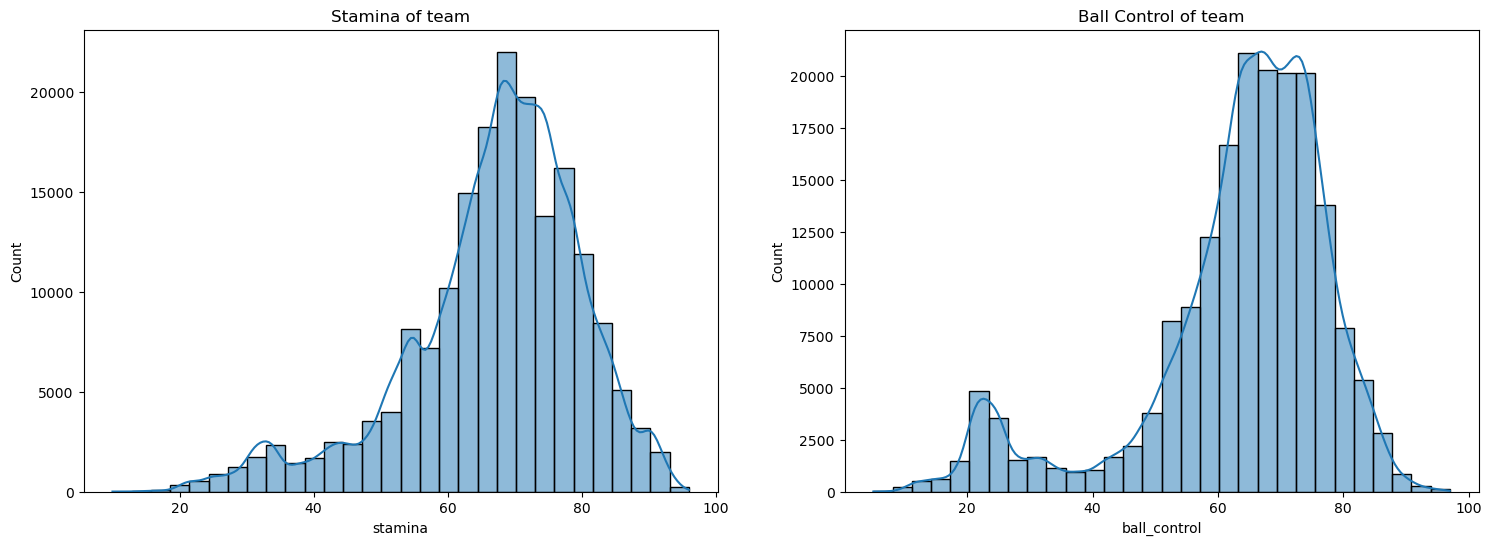

In [42]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(df['stamina'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Stamina of team')

sns.histplot(df["ball_control"], bins=30, kde=True, ax=axes[1])

axes[1].set_title('Ball Control of team')

plt.show()

<Axes: ylabel='ball_control'>

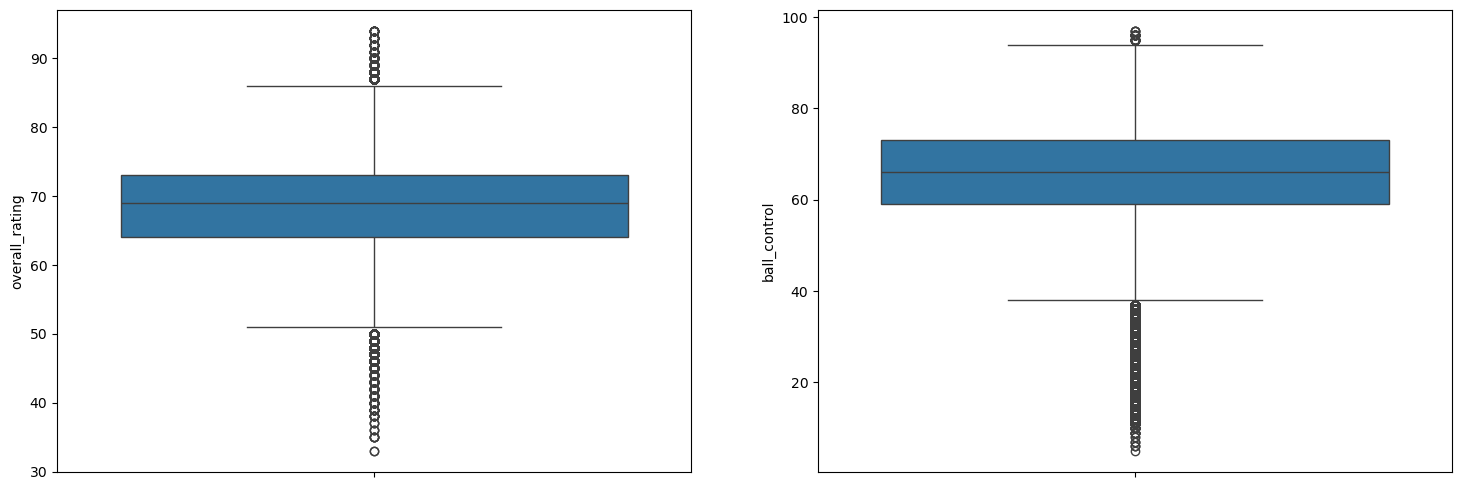

In [46]:
fig, axes = plt.subplots(1,2 , figsize=(18, 6))

sns.boxplot(df['overall_rating'], ax=axes[0])
sns.boxplot(df['ball_control'], ax=axes[1])

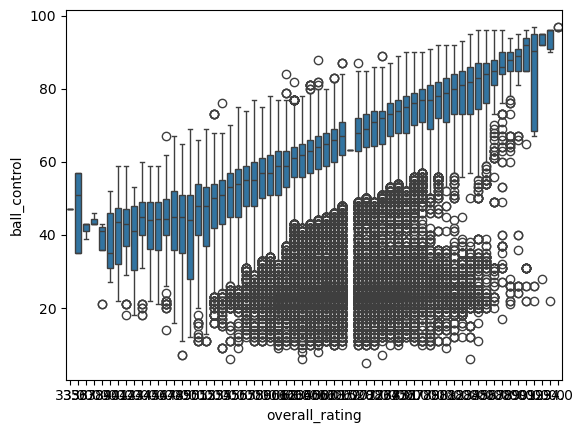

In [47]:
sns.boxplot(x=df['overall_rating'], y=df['ball_control'], data=df)
plt.show()

<Axes: xlabel='sprint_speed', ylabel='stamina'>

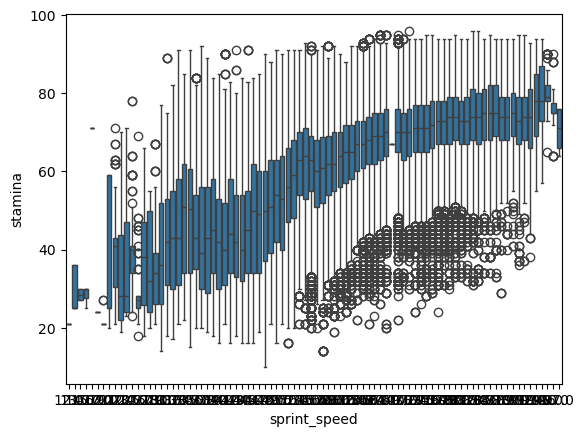

In [49]:
sns.boxplot(x=df['sprint_speed'], y=df['stamina'])

<Axes: xlabel='stamina', ylabel='overall_rating'>

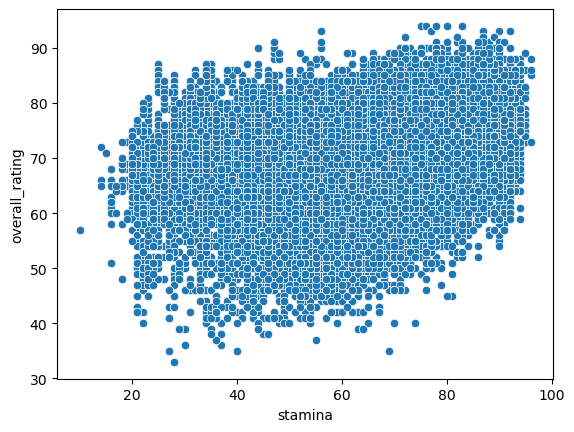

In [54]:
sns.scatterplot(x=df['stamina'], y=df['overall_rating'])


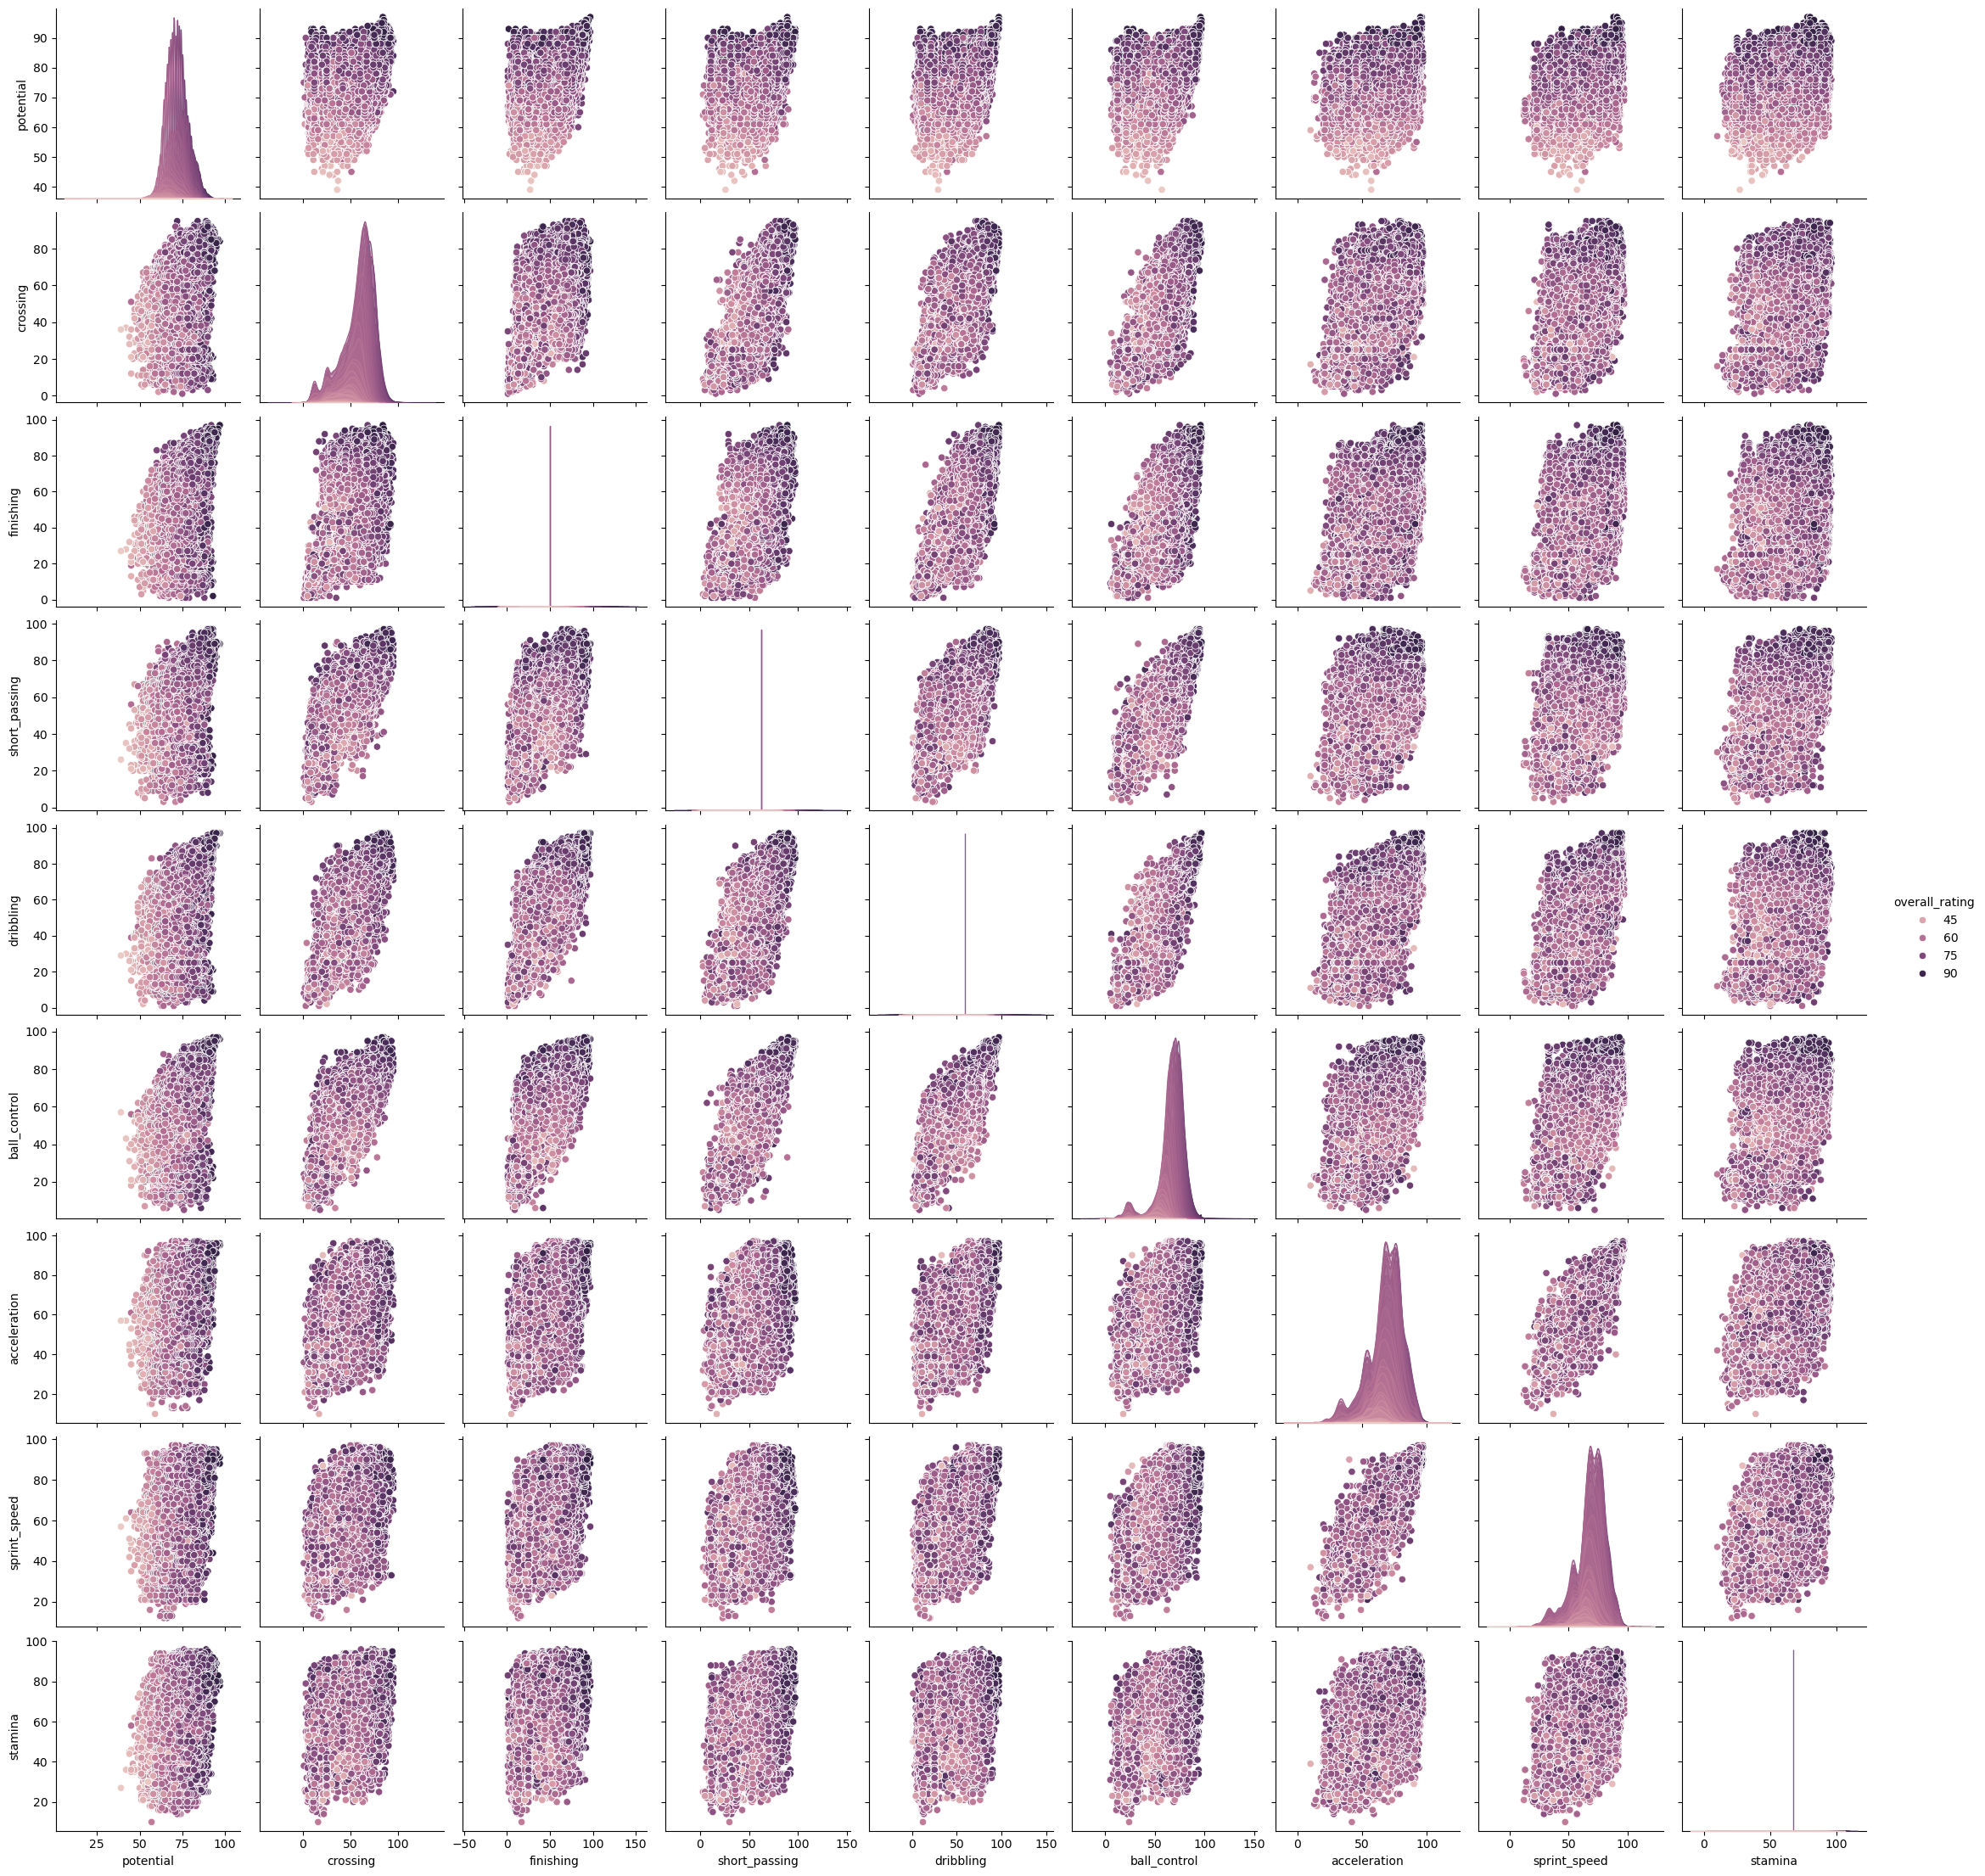

In [55]:
# Pairplot

sns.pairplot(df, hue='overall_rating')
plt.show()

# 1. Key Factors Influencing Match Outcome

#### **Objective**: Identify factors (e.g., possession, shots on target, red cards) that influence the likelihood of winning a match.

In [1]:
import pandas as pd

df = pd.read_csv('D:/Football_Match_Outcome_Prediction/data/preprocessed_df3.csv')
# Correlation between features and match outcomes (Win, Loss, Draw)
df_numeric = df.select_dtypes(include=['number'])
correlation = df_numeric.corr()
print(correlation[['score']])  # Assuming 'win' is a target column for match outcomes


                   score
height         -0.068440
weight         -0.025690
away_team_goal  0.045145
home_team_goal  0.062373
potential       0.421273
crossing        0.503286
finishing       0.372298
short_passing   0.612184
dribbling       0.584319
ball_control    0.656628
acceleration    0.280212
sprint_speed    0.267707
stamina         0.534877
score           1.000000


# 2. Seasonal Trends in Match Outcomes


#### **Objective**: Analyze whether match outcomes or statistics change during specific months or seasons.

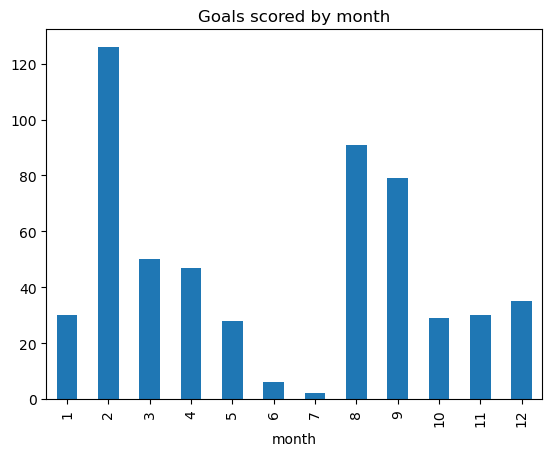

In [2]:
import matplotlib.pyplot as plt
import datetime as dt
#Extract month from match date
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

#plot goals scored by month

monthly_goals = df.groupby('month')['score'].sum()
monthly_goals.plot(kind='bar', title="Goals scored by month")
plt.savefig("seasonal_trends.png")
plt.show()

# 3.Top-performing Teams or Players

#### **Objective**: Identify teams or players who consistently perform well in terms of goals, assists, or defensive metrics.

In [3]:
import plotly.express as px
team_performance = df.groupby('team_long_name')['score'].sum()
barplot = px.bar(df, x="team_long_name", y="score", title="Goals Scored by Team")

barplot.write_image("team_goals.png")

plt.show()

# 4. Anomalies in the Data

### **Objective**: Detect and analyze unusually high goal counts or unexpected match outcomes.

In [15]:
from scipy import stats

#Detect  outlier in goals scored
z_scores = stats.zscore(df['score'])
outliers = df[abs(z_scores) > 2]
print(outliers)

                   team_long_name               player_name  height  weight  \
2                SV Zulte-Waregem               Aaron Doran  170.18   163.0   
3                Sporting Lokeren             Aaron Galindo  182.88   198.0   
4               KSV Cercle Brugge              Aaron Hughes  182.88   154.0   
32                 Wigan Athletic              Abdou Diallo  182.88   159.0   
33                    Aston Villa              Abdou Traore  180.34   174.0   
34                Manchester City                 Abdoul Ba  200.66   212.0   
35                        Everton         Abdoul Karim Yoda  182.88   161.0   
36               Blackburn Rovers    Abdoul Razzagui Camara  177.80   157.0   
37                  Middlesbrough            Abdoulay Konko  182.88   157.0   
62                        SM Caen            Abel Hernandez  185.42   161.0   
63                    Le Havre AC          Abel Issa Camara  185.42   179.0   
139                         Inter           Adamo Co

# 5. Home vs Away Performance

#### **Objective**: Compare home team performance to away team performance.

In [13]:
import pandas as pd
from scipy.stats import ttest_ind

# Read the CSV file
df = pd.read_csv('D:/Football_Match_Outcome_Prediction/data/preprocessed_df3.csv')

# Extract the home and away team goals
home_goals = df['home_team_goal']
away_goals = df['away_team_goal']

# Perform the t-test
t_stat, p_value = ttest_ind(home_goals, away_goals)
print(f"T-test result: t-statistic = {t_stat}, p-value = {p_value}")


T-test result: t-statistic = 4.886502314319021, p-value = 1.3209786288462601e-06
